# HW 5

by Anjali Munasinghe, Jesse McClay, and Andrés Columna

### Table of Contents

1. [MergeSort vs InsertionSort](#Problem-1)

2. [HybridSorting](#Problem-2)


# Problem 1
# MergeSort vs InsertionSort

## Hypothesis

The CLRS textbook states that insertion sort is more efficient for small n, but that the exact value of n varies between n=7 and n=50 depending on implementation and the environment its run. This makes sense, as mergesort performs the same number of operations
regardless of how partially sorted the array we're sorting is or how large it is, whereas a factor in the time required by insertionsort time is the distance an element is from its final destination. So small array means small distances regardless of where an element is. This mean the best-case time complexity for insertion sort is $O(n)$ when we're sorting an already sorted array. And $O(nk)$ in general, where k is the most out-of-place element. So if the largest element in an array we're trying to sort in increasing order is in index=n-1, this devolves into $O(n^2)$

Despite CLRS' claims, I imagine the $n < 7$ holds for the most efficient implementation of mergesort, which is harder to code (Our version of insertionsort can't be improved in python at least). The easier version of mergesort we're planning on using obviously still has the same asymptotic complexity as any other version of mergesort, but adds some gnarly linear terms that might show up for small n. This is due to copying of lists (e.g. mergesort(arr[:mid]) instead of just passing parameters i and mid and mid and j when splitting the left half and right half of the arrays in mergesort.

So our guess is that insertionsort will be more efficient than mergesort for $n < 60$. Mergesort will be more efficient for all $n > 60$.

## Methods

The version of python used is cPython 3.6.5 |[GCC 4.2.1 Compatible Clang 4.0.1 on darwin VM

My computer is a macbook air w/ 8gb RAM.

We used the timeit library from the python standard lib to time the functions. We use randint from the random library to create random arrays of variable length.

We create ten random arrays for each length n, ranging from array len=1 to len=300. Then we sum how long it takes each algorithm to sort the ten random arrays, and we divide it by ten to find the mean. To be clear, both algorithms sort the same permutation of a random array. The integer sizes used in the random arrays range from 1 to 1000.

#### InsertionSort implementation source: homemade

In [2]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val   

#### InsertionSort test for correctness

In [3]:
def testInsertionSort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        insertionSort(arr)
        
        assert(arr == sorted(arr))
        
    print("Tests Passed")
        
testInsertionSort()

Tests Passed


#### mergesort implementation, source: Andrés + merge from Python Heapq library

In [4]:
from heapq import merge
 
def mergesort(arr):
    length = len(arr)
    
    if length < 2:
        return arr
 
    mid = length // 2
    lefthalf = mergesort(arr[:mid])
    righthalf = mergesort(arr[mid:])
 
    return list(merge(lefthalf, righthalf))

#### test mergesort for correctness

In [5]:
def testMergesort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        
        assert(mergesort(arr) == sorted(arr))
        
    print("Mergesort Tests Passed")
        
testMergesort()

Mergesort Tests Passed


## Time mergesort vs insertion sort

In [7]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 200):
    
    mergeTimes  = 0
    insertTimes = 0
    
 
    # takes average of ten runs
    for _ in range(30):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        
        mergeTimes  += timeit('mergesort(arr1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr2)', number=1, globals=globals())
        
    meanMergeTime =     mergeTimes  / 30.
    meanInsertionTime = insertTimes / 30.
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))

#### Code for graphing in Mathematica 11

```mathematica
MergesortTimeData = 
  ToExpression@
   StringReplace[
    Import["/Users/andres/Desktop/EECS431/HW4/mergeData.txt"], {"e" "*^", "[" -> "{", "]" -> "}"}];
InsertionTimeData = 
  ToExpression@
   StringReplace[
    Import["/Users/andres/Desktop/EECS431/HW4/insertData.txt"], {"e" \"*^", "[" -> "{", "]" -> "}"}];
ListLinePlot[{InsertionTimeData, MergesortTimeData}, 
 PlotLegends -> {"InsertionSort", "MergeSort"}, 
 AxesLabel -> {HoldForm["Len(x)"], HoldForm["Seconds"]}, 
 PlotLabel -> HoldForm["InsertionSort vs MergeSort"], 
 LabelStyle -> {14, GrayLevel[0]}]

```

## Results

the graph below indicates that mergesort becomes as fast as insertionsort around $n=95$ and clearly overtakes it at around $ n=130 $

For $n < 90$, insertionsort is consistently faster than mergesort by tens of microseconds.  For $n > 150$, the $n^2$ time complexity of insertion sort becomes apparent. And the $n \log{n}$ time complexity of mergsort is noticeably faster.

In our The x-axis denotes the length of the array of integers (i.e. n). The y-axis denots the time it takes to sort the array.
The data is discrete, so it should be a scatter plot but lines were drawn in between points so as to make it easier to read when lines cross. We used Wolfram Mathematica to graph the data.

![Image of Yaktocat](https://cdn.pbrd.co/images/HKrGrqb.png)

## Conclusions

Under the conditions tested, insertion sort produces a faster algorithm for n < 95, while mergesort is faster for n > 130. For n between 95 and 130 the two sorting algorithms are indistinguishable.

This is a second, clearer run of timing for n < 200.

![second run](https://cdn.pbrd.co/images/HKzrUct.png)

Upon closer inspection, the precise value at which MergeSort overtakes InsertionSort is n=103. The values are in seconds. n equals the number of elements in the array

![](https://cdn.pbrd.co/images/HKA3raz.png)

#### Using an in-place version of Mergesort

In [131]:
# using a different version in-place version of mergesort

# merge sort
def mergeSort2(arr, first, last):
    if first < last:
            middle = (first+last)//2            
            mergeSort2(arr, first, middle)
            mergeSort2(arr, middle+1, last)
            merge2(arr, first, middle, last)

def merge2(arr, first, middle, last):
    left = arr[first: middle + 1]
    right = arr[middle+1:last+1]
    
    left.append(sys.maxsize)
    right.append(sys.maxsize)
    
    i = j = 0

    for k in range (first, last+1):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            
def testMergeSort2():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        mergeSort2(arr, 0, len(arr)-1)
        
        assert(arr == sorted(arr))
        
    print("Mergesort2 Tests Passed")
        
testMergeSort2()

Mergesort2 Tests Passed


In [135]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 100):
    
    mergeTimes  = 0
    insertTimes = 0
    
 
    # takes average of ten runs
    for _ in range(30):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        
        mergeTimes  += timeit('mergeSort2(arr1,0,len(arr1)-1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr2)', number=1, globals=globals())
        
    meanMergeTime =     mergeTimes  / 30.
    meanInsertionTime = insertTimes / 30.
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))

![mahlink](https://preview.ibb.co/bzrO7f/image.png)

For the in-place mergesort, mergesort surpasses insertionSort at n=50

---

# Problem 2
## Hybrid Sorting

### Using my versions of InsertionSort and MergeSort

In [140]:
from heapq import merge
 
def mergeSort(arr):
    length = len(arr)
    
    if length < 2:
        return arr
 
    mid = length // 2
    lefthalf = mergesort(arr[:mid])
    righthalf = mergesort(arr[mid:])
 
    return list(merge(lefthalf, righthalf))

def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val  
    return arr

In [151]:
from heapq import merge
 
def hybridSort(arr, n=103):
    length = len(arr)
    
    if length < 100:
        return insertionSort(arr)
    
    else:
 
        mid = length // 2
        lefthalf = hybridSort(arr[:mid])
        righthalf = hybridSort(arr[mid:])
        return list(merge(lefthalf, righthalf))

In [193]:
arr = [randint(1,100) for i in range(500)]

In [194]:
original = arr

In [201]:
%%timeit -n1 -r10 arr = deepcopy(original)

hybridSort(arr)

2.42 ms ± 358 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [202]:
%%timeit -n1 -r10 arr = deepcopy(original)

mergeSort(arr)

3.23 ms ± 289 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [224]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []
hybridTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(0, 500):
    
    mergeTimes  = 0
    insertTimes = 0
    hybridTimes = 0
    
 
    # takes average of ten runs
    
    arr1 = [randint(1, 1000) for i in range(arrlen)]
    arr2 = deepcopy(arr1)
    arr3 = deepcopy(arr1)

    hybridTimes += timeit('hybridSort(arr1)', number=1, globals=globals())
    mergeTimes  += timeit('mergeSort(arr2)',     number=1, globals=globals())
    insertTimes += timeit('insertionSort(arr3)', number=1,    globals=globals())

        
    meanMergeTime =     mergeTimes 
    meanInsertionTime = insertTimes 
    meanHybridTime = hybridTimes
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    hybridTimesArr.append(hybridTimes)
    
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))
print(hybridTimesArr, file=open("hybridData.txt", "a"))

In [153]:
%%timeit arr = [randiddnt(1, 100) for i in range(randint(1,200))]

mergeSort(arr)dddddddd

The slowest run took 3810.41 times longer than the fastest. This could mean that an intermediate result is being cached.
284 µs ± 221 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [48]:
dddddddd

In [59]:
arr = [randint(1, 100) for i in range(10)]
arr

[53, 22, 41, 95, 2, 100, 74, 28, 79, 29]

In [119]:
# hybrid sort
def hybridSort(arr, first, last):
    if first < last:
        if (last-first) > 50:
            middle = (first+last)//2            
            hybridSort(arr, first, middle)
            hybridSort(arr, middle+1, last)
            merge(arr, first, middle, last)
        else:
            insertionSort(arr) 

# merge sort
def mergeSort(arr, first, last):
    if first < last:
            middle = (first+last)//2            
            mergeSort(arr, first, middle)
            mergeSort(arr, middle+1, last)
            return merge(arr, first, middle, last)


# insertion sort
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val

In [74]:
arr = [randint(1, 100) for i in range(10)]
arr

[64, 32, 52, 48, 76, 32, 40, 61, 57, 11]

In [75]:
mergeSort(arr, 0, len(arr)-1)

In [72]:

from heapq import merge

In [78]:
a = [1,2,44]
b = [5,3,1]
list(merge(a,b))

[1, 2, 5, 3, 1, 44]

In [125]:
import sys

k=20

# hybrid sort
def hybridSort(arr, first, last):
    if first < last:
        if (last-first) > k:
            middle = (first+last)//2            
            hybridSort(arr, first, middle)
            hybridSort(arr, middle+1, last)
            merge(arr, first, middle, last)
        else:
            insertionSort(arr) 

# merge sort
def mergeSort(arr, first, last):
    if first < last:
            middle = (first+last)//2            
            mergeSort(arr, first, middle)
            mergeSort(arr, middle+1, last)
            merge(arr, first, middle, last)

def merge(arr, first, middle, last):
    left = arr[first:middle+1]
    right = arr[middle+1:last+1]
    left.append(sys.maxsize)
    right.append(sys.maxsize)
    i = j = 0

    for k in range (first, last+1):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            
def insertionSort(arr):
    for i in range(1, len(arr)):
        j = i
        val = arr[i]
        while j > 0 and arr[j - 1] > val:
            arr[j] = arr[j - 1]
            j -= 1
        arr[j] = val  

In [114]:
def testMergesort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        mergeSort(arr, 0, len(arr) - 1)
        
        assert(arr == sorted(arr))
        
    print("Mergesort Tests Passed")
        
testMergesort()

Mergesort Tests Passed


In [120]:
def testHybridSort():
    
    from random import randint
    from copy import deepcopy
    
    # test for 100 random arrays of random length between 1 and 100
    for _ in range(100):
        
        arr = [randint(1, 100) for i in range(randint(1,100))]
        
        copyArr = deepcopy(arr)
        hybridSort(arr, 0, len(arr) - 1)
        
        assert(arr == sorted(arr))
        
    print("HybridSort Tests Passed")
        
testHybridSort()

HybridSort Tests Passed


In [126]:
from timeit import timeit
from random import randint
from copy import deepcopy

mergesortTimesArr = [] 
insertTimesArr = []
hybridTimesArr = []

# time sorts from len(arr) == 1 to len(arr) == 100 
for arrlen in range(1, 200):
    
    mergeTimes  = 0
    insertTimes = 0
    hybridTimes = 0
    
 
    # takes average of ten runs
    for _ in range(10):
        arr1 = [randint(1, 1000) for i in range(arrlen)]
        arr2 = deepcopy(arr1)
        arr3 = deepcopy(arr1)
        
        #hybridTimes += timeit('hybridSort(arr1, 0, len(arr1)-1)', number=1, globals=globals())
        mergeTimes  += timeit('mergeSort(arr2, 0, len(arr2)-1)',     number=1, globals=globals())
        insertTimes += timeit('insertionSort(arr3)', number=1,    globals=globals())
       
        
    meanMergeTime =     mergeTimes  / 10.
    meanInsertionTime = insertTimes / 10.
    # meanHybridTime = hybridTimes / 10.
    
    mergesortTimesArr.append(meanMergeTime)
    insertTimesArr.append(meanInsertionTime)
    #hybridTimesArr.append(hybridTimes)
    
    
print(mergesortTimesArr, file=open("mergeData.txt", "a"))
print(insertTimesArr, file=open("insertData.txt", "a"))
# print(hybridTimesArr, file=open("hybridData.txt", "a"))

In [123]:
sorted??

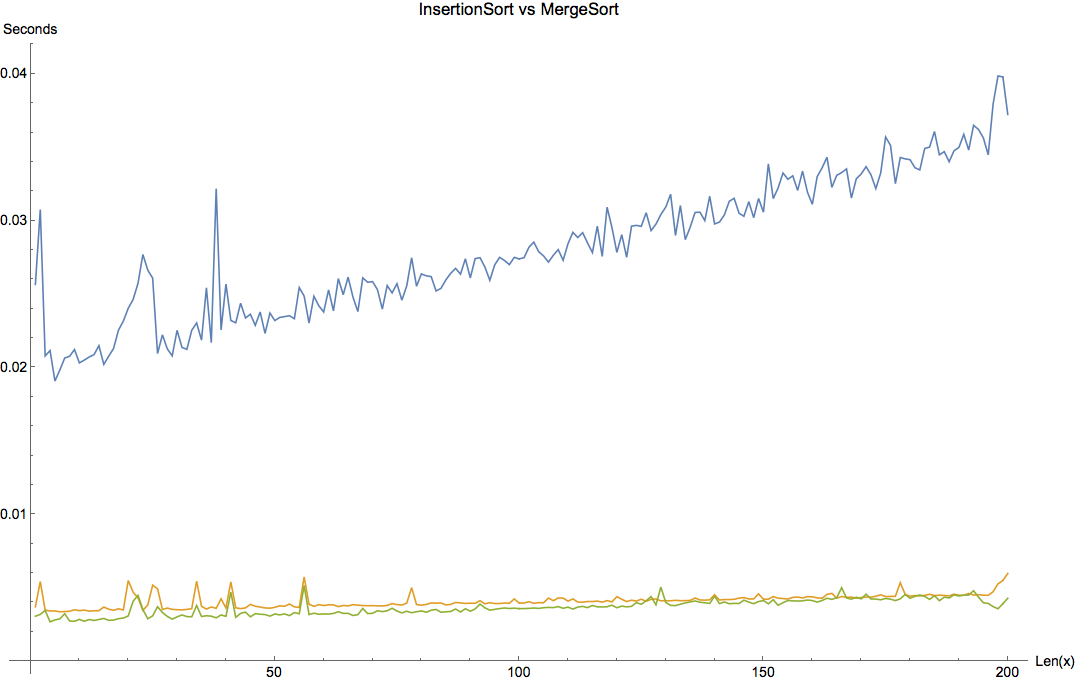

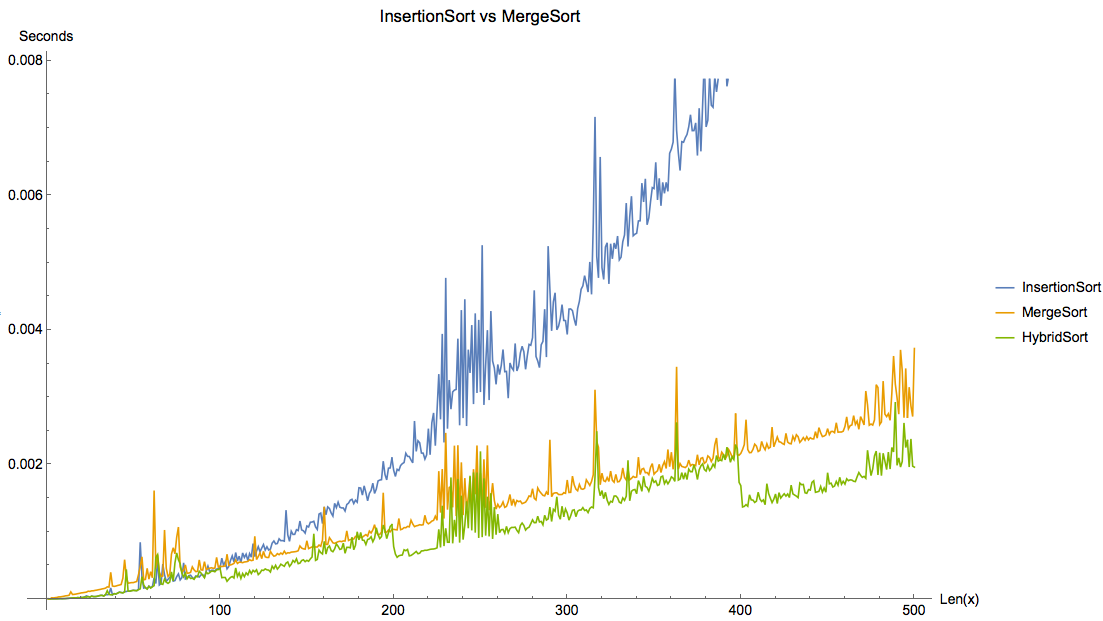

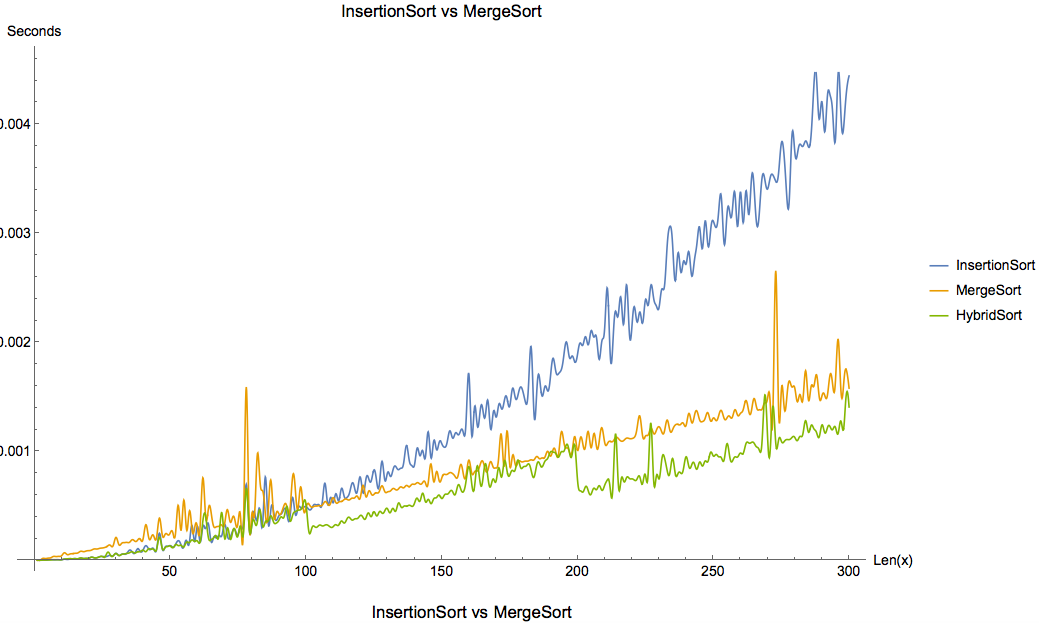